In [1]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

In [2]:
classifier = pipeline("zero-shot-classification",
                      model="morit/french_xlm_xnli")

In [3]:
# filtered datafraimes. Arcom_fk_df contains the advertisements it refers to
arcom_fk_df = pd.read_csv('data/cross_arcom_off/arcom_data_alimentation_off_fk.csv', index_col=0)
off_fk_df = pd.read_csv('data/cross_arcom_off/off_data_filtered_for_arcom.csv', index_col=0)

arcom_fk_df['off_indexes'] = [[] if x[1:-1] == '' else x[1:-1].split(', ') 
                           for x in arcom_fk_df['off_indexes']]
arcom_fk_df = arcom_fk_df[[len(x) > 0 for x in arcom_fk_df['off_indexes']]]

# raw dataframes
off_df = pd.read_csv("/Users/thibaultrolland/Projects/arcom/data/en.openfoodfacts.org.products.csv", sep='\t')
arcom_df = pd.read_csv("data/ARCOM.csv")

/var/folders/cf/xcc222mj0yg3dzy7mljbx99w0000gn/T/ipykernel_37780/2343849048.py:10: DtypeWarning: Columns (0,9,15,21,22,23,29,30,31,32,33,42,44,50,54,65,70,148) have mixed types. Specify dtype option on import or set low_memory=False.
  off_df = pd.read_csv("/Users/thibaultrolland/Projects/arcom/data/en.openfoodfacts.org.products.csv", sep='\t')
/var/folders/cf/xcc222mj0yg3dzy7mljbx99w0000gn/T/ipykernel_37780/2343849048.py:11: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  arcom_df = pd.read_csv("data/ARCOM.csv")


In [4]:
cross_df = arcom_df.loc[arcom_fk_df.index]

off_indexes = arcom_fk_df['off_indexes'].apply(lambda x: int(x[0]))
off_sub_df = off_df.loc[off_indexes,[
    'ecoscore_grade',
    'nutriscore_grade',
    'labels',
    'labels_tags',
    'labels_en'
]]

cross_df['ecoscore_grade'] = list(off_sub_df['ecoscore_grade'])
cross_df['nutriscore_grade'] = list(off_sub_df['nutriscore_grade'])
cross_df['labels'] = list(off_sub_df['labels'])
cross_df['labels_tags'] = list(off_sub_df['labels_tags'])
cross_df['labels_en'] = list(off_sub_df['labels_en'])


In [10]:


def plot_for_candidate(cand_i, classes, classifications, candidate_labels):
    data = []
    for c in classes:
        data.append( [x['scores'][cand_i] for x in classifications if x['class'] == c])
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=classes)
    plt.title(candidate_labels[cand_i])
    plt.ylabel('Values')
    plt.xlabel('Classes')
    plt.show()

def zeroshot(candidate_labels):
    text_data = cross_df['clean_bigram_total'].tolist()
    classifications = classifier(text_data, candidate_labels=candidate_labels, multi_label=True)
    for i in range(len(classifications)): 
        classifications[i]['class'] = list(cross_df['nutriscore_grade'])[i]
    classes = sorted([str(x) for x in cross_df['nutriscore_grade'].unique()])

    for i in range(len(candidate_labels)):
        plot_for_candidate(i, classes, classifications, candidate_labels)
    return {'classifications': classifications, 'classes' : classes}

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/Users/thibaultrolland/anaconda3/envs/arcomenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x2b5bca5b0> was reported to be 2844 (when accessing len(dataloader)), but 2845 samples have been fetched. 
  warnings.warn(warn_msg)
/Users/thibaultrolland/anaconda3/envs/arcomenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x2b5bca5b0> was reported to be 2844 (when accessing len(dataloader)), but 2846 samples have been fetched. 
  warnings.warn(warn_msg)
/Users/thibaultrolland/anaconda3/envs/arcomenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <transforme

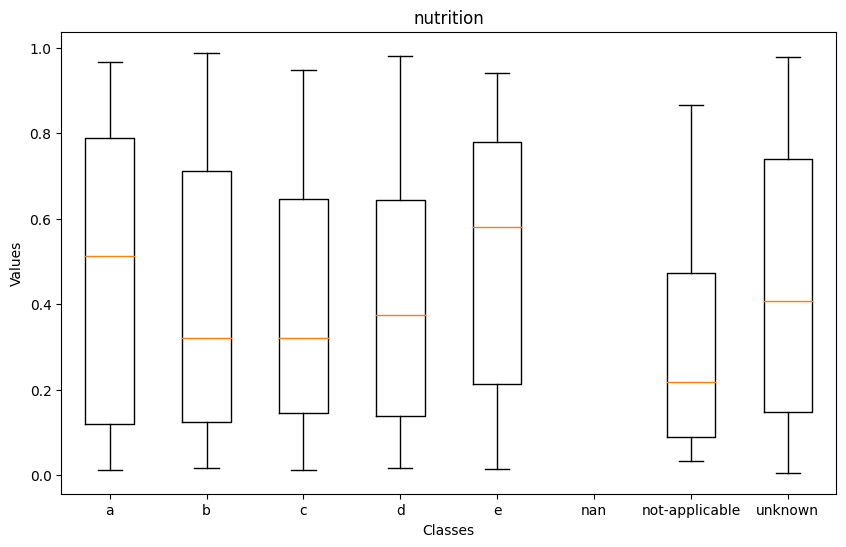

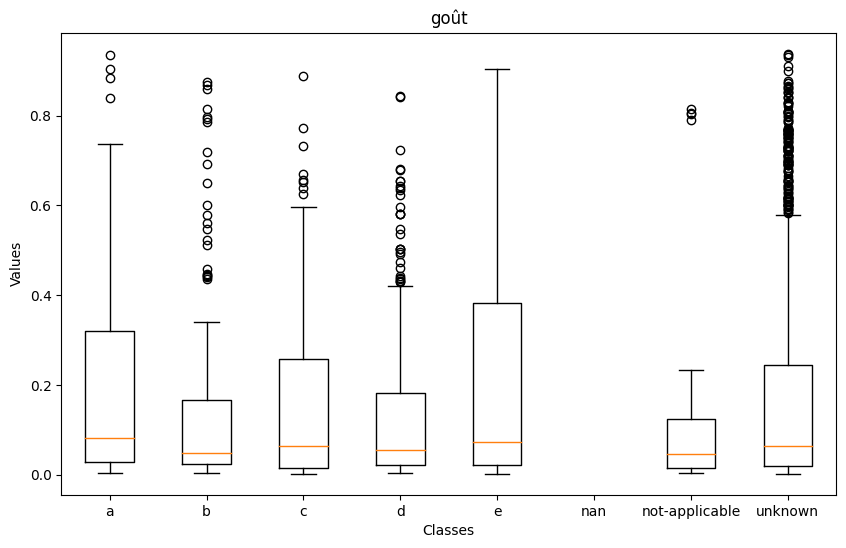

TypeError: unhashable type: 'list'

In [6]:
candidate_labels = ['nutrition', 'goût']
class1 = zeroshot(candidate_labels)

/Users/thibaultrolland/anaconda3/envs/arcomenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x3fed52520> was reported to be 2844 (when accessing len(dataloader)), but 2845 samples have been fetched. 
  warnings.warn(warn_msg)
/Users/thibaultrolland/anaconda3/envs/arcomenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x3fed52520> was reported to be 2844 (when accessing len(dataloader)), but 2846 samples have been fetched. 
  warnings.warn(warn_msg)
/Users/thibaultrolland/anaconda3/envs/arcomenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:642: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x3fed52520> was reported to be 2844 (when accessing len(dataloader)), but 2847 samples

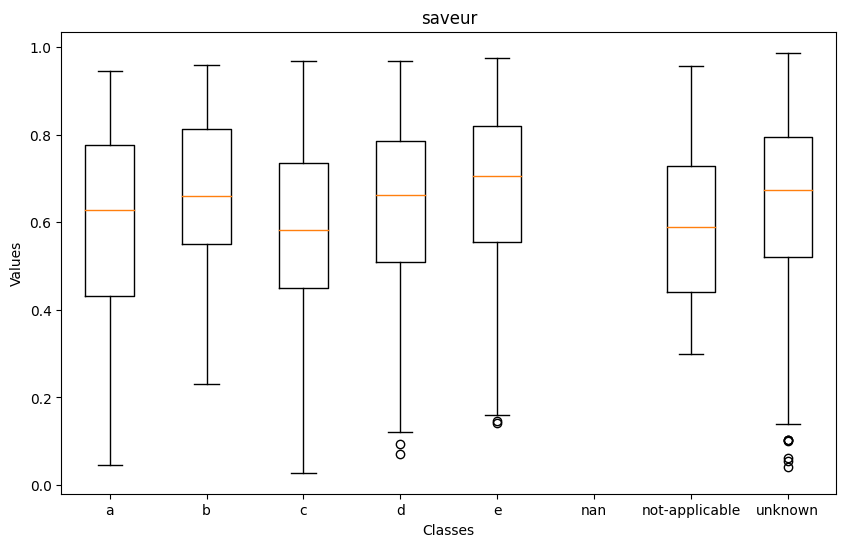

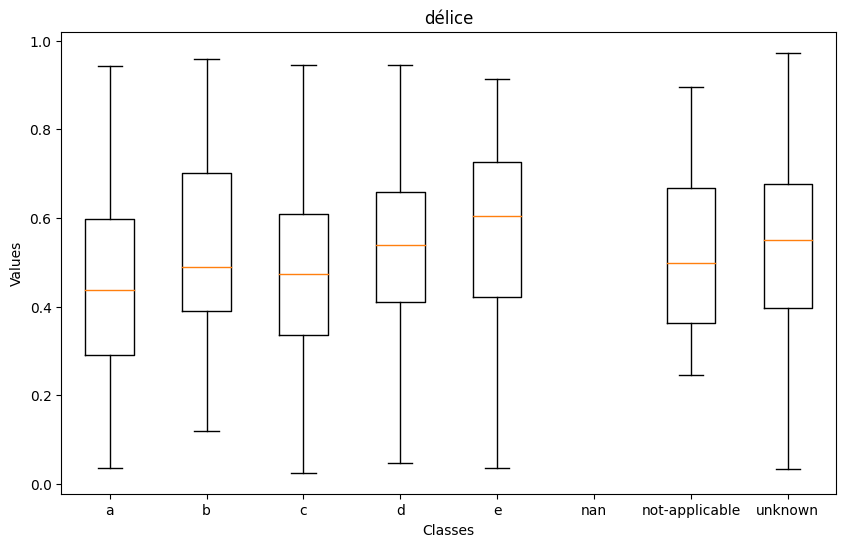

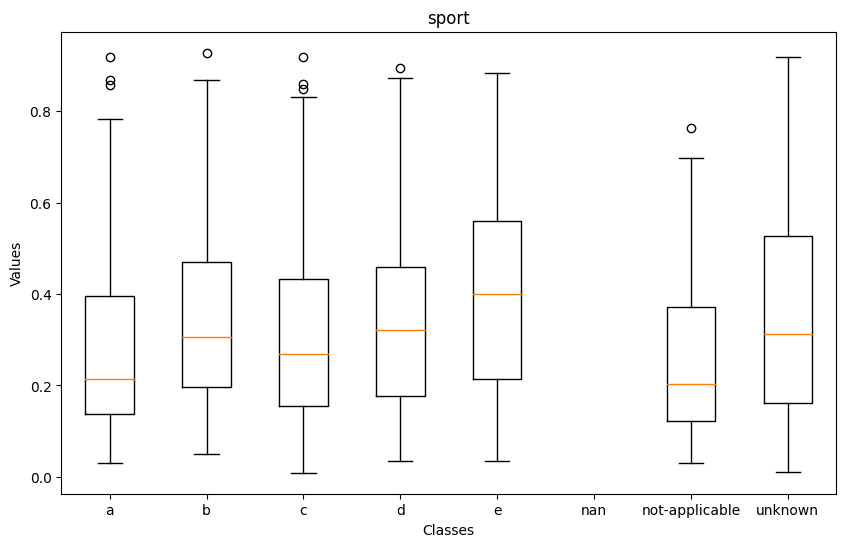

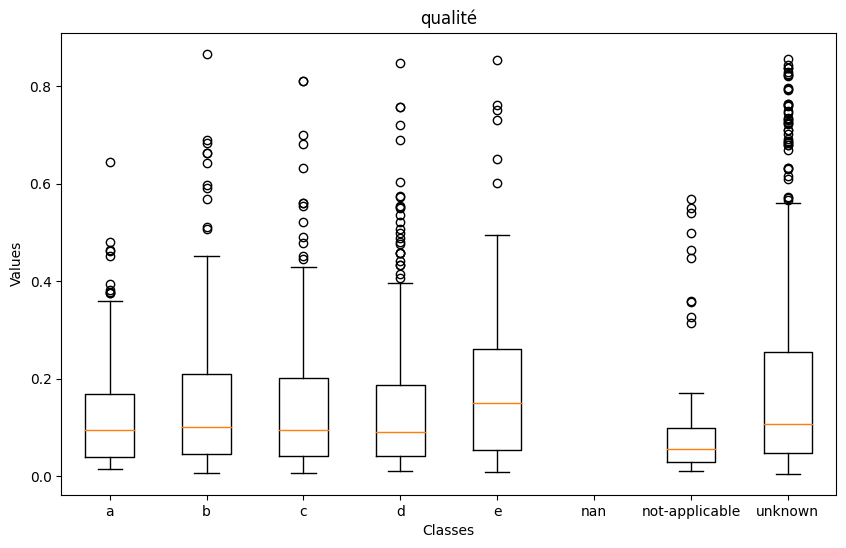

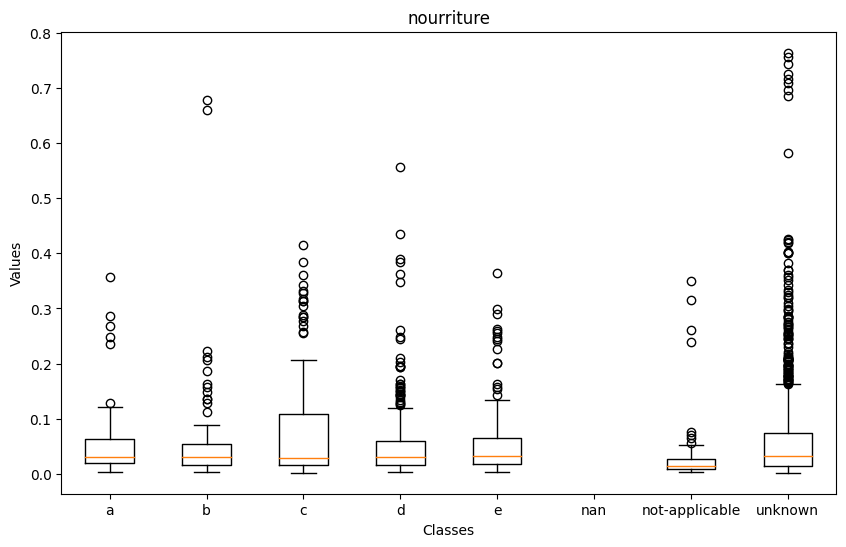

In [11]:
candidate_labels = ['saveur', 'délice', 'sport', 'qualité', 'nourriture']
zeroshot2 = zeroshot(candidate_labels)